# PQ MEASUREMENTS DATA NOTEBOOK

#### LOCATION: TORRE T.OP.
#### START TIME: AUG 12TH
#### END TIME: SEP 13TH
#### POWER ANALYZER: CIRCUTOR MYEBOX 1500

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
xslx = pd.ExcelFile("PQDATA_TOP.xlsx")

df1= pd.read_excel(xslx, "10min")
df2= pd.read_excel(xslx, "5min")
df3= pd.read_excel(xslx, "harmonics")
df4= pd.read_excel(xslx, "unbalance")
df5= pd.read_excel(xslx, "thd")

In [3]:
df1.head()

,Fecha,Current-A-x,Current-B-x,Current-C-x,ActivePower,Freq,ReactivePower,Volts-ab-x,Volts-bc-x,Volts-ca-x,...,Volts-bc-h,Volts-ca-h,Spower,PLT-A,PLT-B,PLT-C,PST-A,PST-B,PST-C,%s
0,2022-08-12 18:50:00,192.644,219.912,188.212,143,60.013,42,495.06,492.86,492.17,...,13553.650,13534.675,171,0.000,0.000,0.000,0.13,0.13,0.13,13.68
1,2022-08-12 19:00:00,173.208,196.579,169.778,128,60.003,39,494.10,492.02,491.20,...,13530.550,13508.000,153,0.470,0.240,0.240,0.59,0.24,0.24,12.24
2,2022-08-12 19:10:00,178.544,203.579,172.689,132,59.991,39,493.51,491.53,490.81,...,13517.075,13497.275,158,0.413,0.202,0.205,0.16,0.14,0.15,12.64
3,2022-08-12 19:20:00,144.054,171.496,142.420,113,59.993,36,495.05,493.22,492.40,...,13563.550,13541.000,130,0.376,0.181,0.185,0.11,0.11,0.12,10.40
4,2022-08-12 19:30:00,163.109,189.385,162.405,127,60.001,39,495.65,493.82,492.89,...,13580.050,13554.475,147,0.351,0.175,0.179,0.15,0.15,0.16,11.76


In [4]:
df2.head()

,Fecha,PF-inst,PF-max
0,2022-08-12 18:50:00,0.91,0.94
1,2022-08-12 18:55:00,0.91,0.94
2,2022-08-12 19:00:00,0.91,0.94
3,2022-08-12 19:05:00,0.92,0.94
4,2022-08-12 19:10:00,0.92,0.95


In [5]:
df3.head()

,Order,a-perc-h,b-perc-h,c-perc-h
0,2,0.072621,0.069518,0.094806
1,3,0.980379,0.764699,0.189611
2,4,0.048414,0.041711,0.047403
3,5,3.497897,3.865208,3.413003
4,6,0.060517,0.041711,0.047403


In [6]:
df4.head()

,Fecha,Current-A-h,Current-B-h,Current-C-h,i-beta,%unb-iH,Volts-ab-h,Volts-bc-h,Volts-ca-h,v-beta,%unb-vH
0,2022-08-12 18:50:00,7.005236,7.996800,6.844073,0.340102,10.180450,13614.150,13553.650,13534.675,0.333342,0.353493
1,2022-08-12 19:00:00,6.298473,7.148327,6.173745,0.339385,9.615825,13587.750,13530.550,13508.000,0.333342,0.350747
2,2022-08-12 19:10:00,6.492509,7.402873,6.279600,0.340566,10.531392,13571.525,13517.075,13497.275,0.333341,0.328364
3,2022-08-12 19:20:00,5.238327,6.236218,5.178909,0.343980,12.846056,13613.875,13563.550,13541.000,0.333340,0.317561
4,2022-08-12 19:30:00,5.931236,6.886727,5.905636,0.340762,10.676514,13630.375,13580.050,13554.475,0.333341,0.328300


In [7]:
df5.head()

,Fecha,thdi-a,thdi-b,thdi-c,thdv-a,thdv-b,thdv-c
0,2022-08-12 18:50:00,35.59,33.17,34.78,2.31,2.06,1.98
1,2022-08-12 19:00:00,32.79,30.63,31.87,2.21,1.96,1.93
2,2022-08-12 19:10:00,31.66,29.35,31.28,2.18,1.92,1.91
3,2022-08-12 19:20:00,31.28,28.41,29.81,2.00,1.78,1.72
4,2022-08-12 19:30:00,32.86,30.55,31.00,2.22,1.99,1.85


# 1. Frecuencia

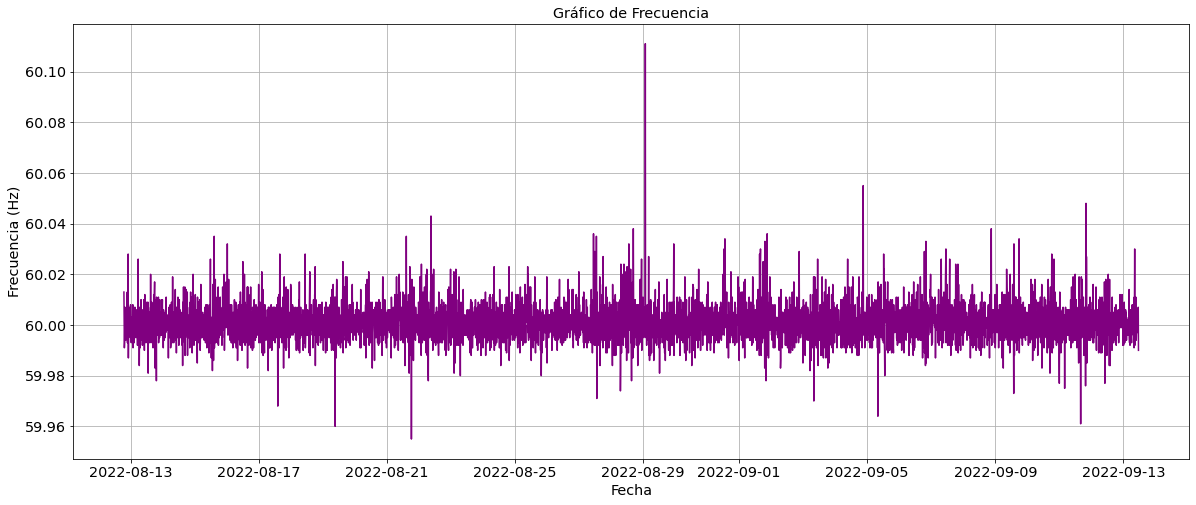

In [7]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
freq= df1['Freq']
plt.plot(x1, freq, color='purple', label='Frecuencia (Hz)')

plt.title('Gráfico de Frecuencia')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia (Hz)')
plt.grid()



## 1.1 Cálculo de la frecuencia promedio

In [8]:
freq= df1['Freq']
freq.mean(axis= 'index')

60.001248904469854

# 2. Potencia activa KW

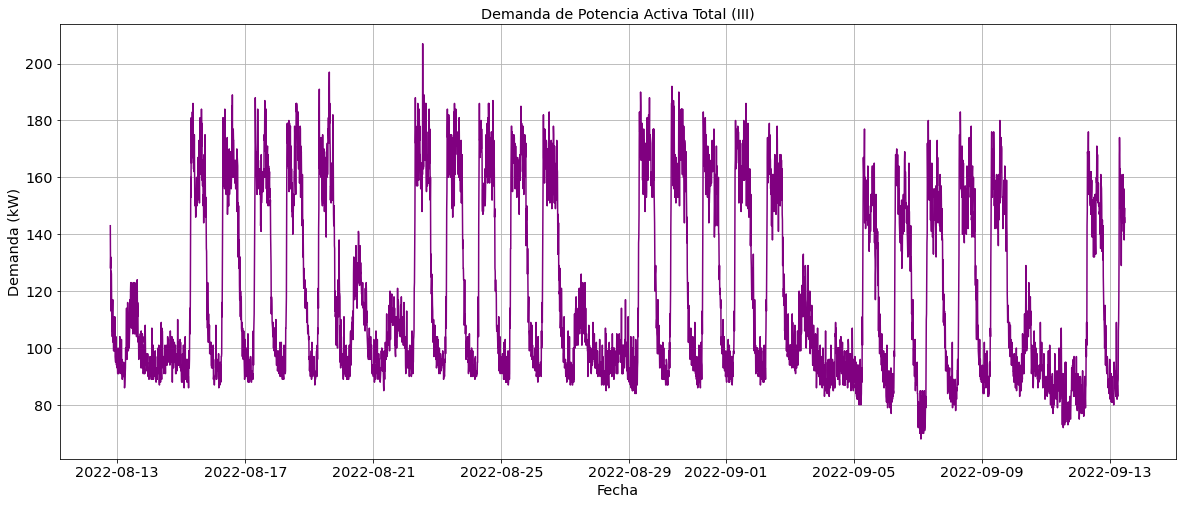

In [9]:

plt.figure(figsize=(20,8))
x1= df1['Fecha']
ap= df1['ActivePower']
plt.plot(x1, ap, color='purple', label='Potencia (kW)')

plt.title('Demanda de Potencia Activa Total (III)')
plt.xlabel('Fecha')
plt.ylabel('Demanda (kW)')
plt.grid()


## 2.1 Cálculo de potencia activa promedio

In [10]:
ap= df1['ActivePower']
ap.mean(axis= 'index')

119.09312007011394

# 3. Potencia reactiva KVAR

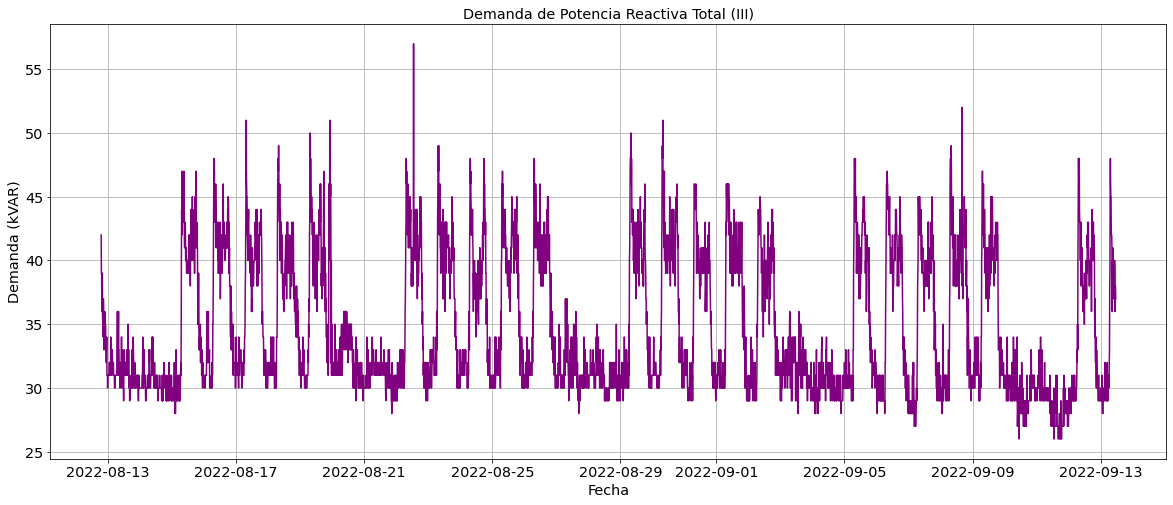

In [11]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
rp= df1['ReactivePower']
plt.plot(x1, rp, color='purple', label='Potencia Reactiva (kVAR)')

plt.title('Demanda de Potencia Reactiva Total (III)')
plt.xlabel('Fecha')
plt.ylabel('Demanda (kVAR)')
plt.grid()
plt.show()


## 3.1 Cálculo de potencia reactiva promedio 

In [12]:
rp= df1['ReactivePower']
rp.mean(axis= 'index')

34.72217353198948

# 4. Potencia aparente

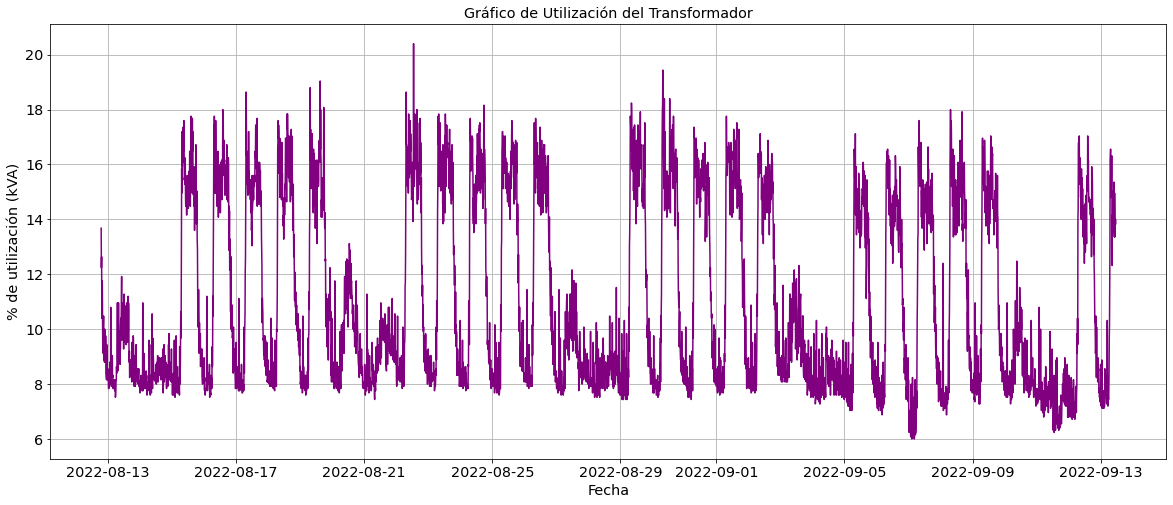

In [13]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
sp= df1['%s']
plt.plot(x1, sp, color='purple', label='Potencia Aparente (kVA)')

plt.title('Gráfico de Utilización del Transformador')
plt.xlabel('Fecha')
plt.ylabel('% de utilización (kVA)')
plt.grid()
plt.show()


## 4.1 Porcentaje promedio de utilizacion

In [14]:
sp= df1['%s']
sp.mean(axis= 'index')

11.001893076248912

# 5. Corrientes por fase en baja tension

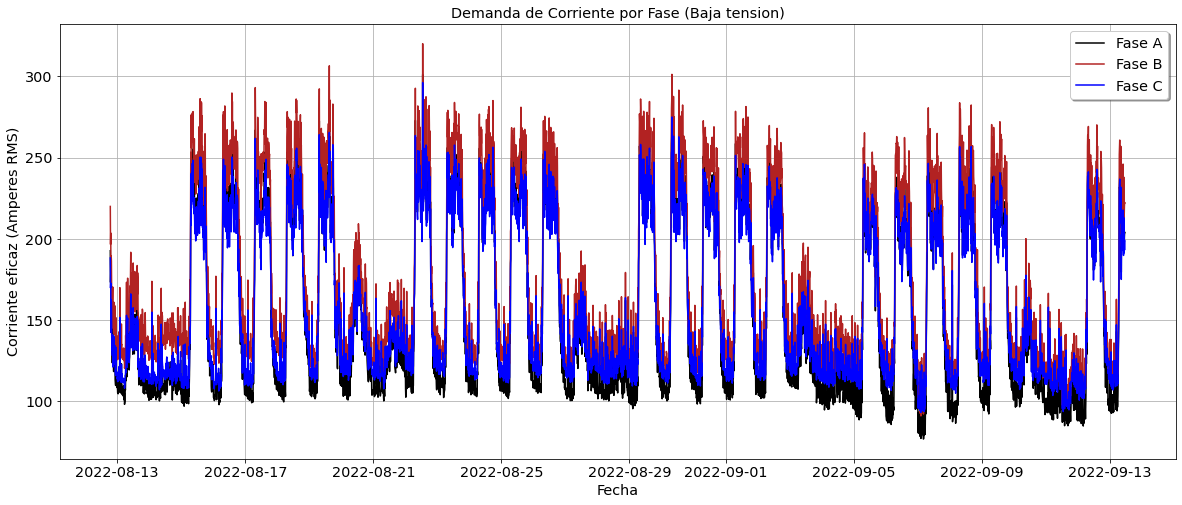

In [15]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
cax= df1['Current-A-x']
cbx= df1['Current-B-x']
ccx= df1['Current-C-x']

plt.plot(x1, cax, color ='black', label='Fase A')
plt.plot(x1, cbx, color = 'firebrick', label='Fase B')
plt.plot(x1, ccx, color = 'blue', label= 'Fase C')

plt.title('Demanda de Corriente por Fase (Baja tension)')
plt.xlabel('Fecha')
plt.ylabel('Corriente eficaz (Amperes RMS)')
plt.grid()
plt.legend( shadow=True )
plt.show()

## 5.1 Corriente promedio de la fase A en BT

In [16]:
cax= df1['Current-A-x']

cax.mean(axis= 'index')

153.30430455740617

## 5.2 Corriente promedio de la fase B en BT

In [17]:
cbx= df1['Current-B-x']

cbx.mean(axis= 'index')

175.05631354075402

## 5.3 Corriente promedio de la fase C en BT

In [18]:
ccx= df1['Current-C-x']

ccx.mean(axis= 'index')

157.26825482033402

# 6. Corrientes por fase en media tension

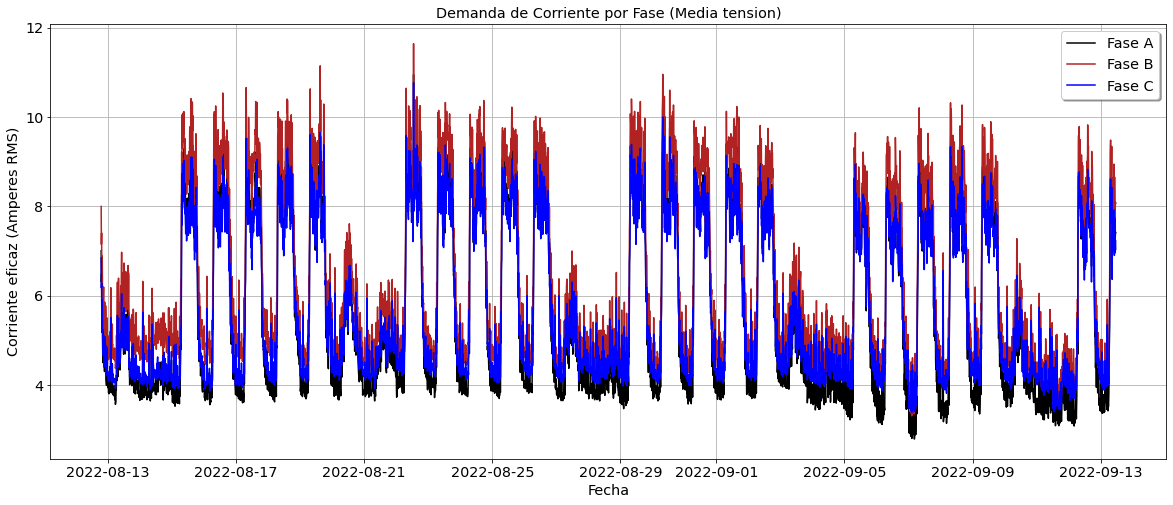

In [19]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
cah= df1['Current-A-h']
cbh= df1['Current-B-h']
cch= df1['Current-C-h']

plt.plot(x1, cah, color ='black', label='Fase A')
plt.plot(x1, cbh, color = 'firebrick', label='Fase B')
plt.plot(x1, cch, color = 'blue', label= 'Fase C')

plt.title('Demanda de Corriente por Fase (Media tension)')
plt.xlabel('Fecha')
plt.ylabel('Corriente eficaz (Amperes RMS)')
plt.grid()
plt.legend( shadow=True )
plt.show()

## 6.1 Corriente promedio de la fase A en MT

In [20]:
cah= df1['Current-A-h']

cah.mean(axis= 'index')

5.574701983905688

## 6.1 Corriente promedio de la fase B en MT

In [21]:
cbh= df1['Current-B-h']

cbh.mean(axis= 'index')

6.3656841287546495

## 6.2 Corriente promedio de la fase C en MT

In [22]:
cch= df1['Current-C-h']

cch.mean(axis= 'index')

5.71884562983032

# 7. Voltajes de línea en baja tension

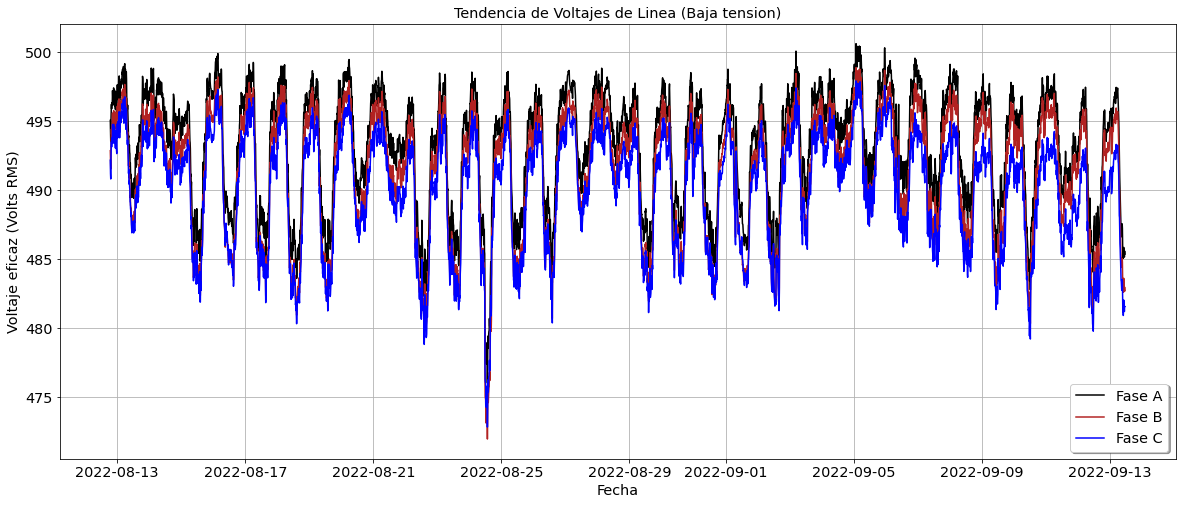

In [23]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
vabx= df1['Volts-ab-x']
vbcx= df1['Volts-bc-x']
vcax= df1['Volts-ca-x']

plt.plot(x1, vabx, color ='black', label='Fase A')
plt.plot(x1, vbcx, color = 'firebrick', label='Fase B')
plt.plot(x1, vcax, color = 'blue', label= 'Fase C')

plt.title('Tendencia de Voltajes de Linea (Baja tension)')
plt.xlabel('Fecha')
plt.ylabel('Voltaje eficaz (Volts RMS)')
plt.grid()
plt.legend( shadow=True, loc='lower right' )
plt.show()

## 7.1 Voltaje de linea AB promedio en BT

In [24]:
vabx= df1['Volts-ab-x']
vabx.mean(axis= 'index')

493.2725175284835

## 7.2 Voltaje de linea BC promedio en BT

In [25]:
vbcx= df1['Volts-bc-x']
vbcx.mean(axis= 'index')

491.3535911481161

## 7.3 Voltaje de linea CA promedio en BT

In [26]:
vcax= df1['Volts-ca-x']
vcax.mean(axis= 'index')

490.1033851884316

# 8. Voltajes de línea en media tension

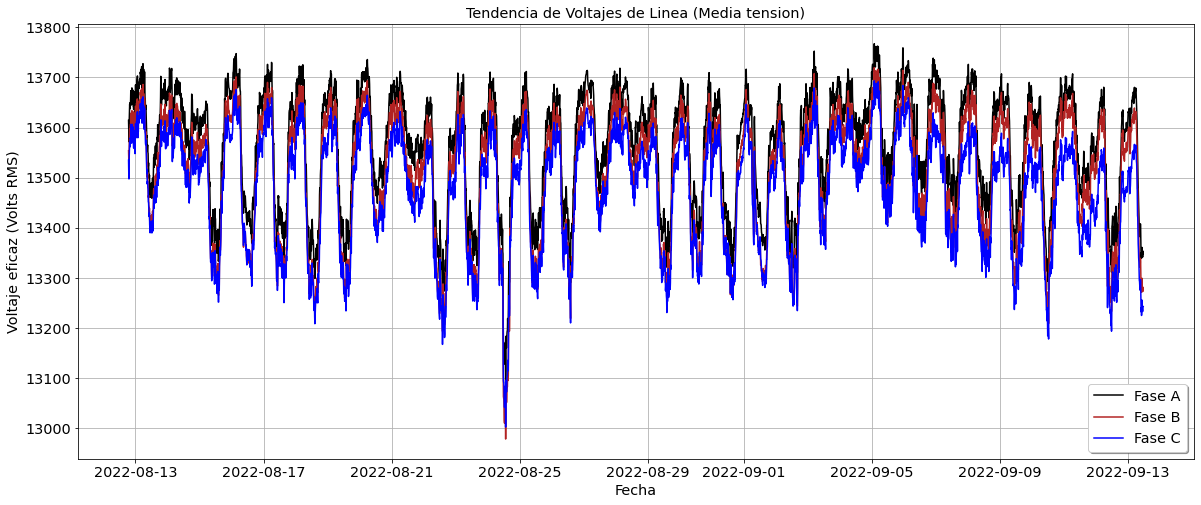

In [27]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
vabh= df1['Volts-ab-h']
vbch= df1['Volts-bc-h']
vcah= df1['Volts-ca-h']

plt.plot(x1, vabh, color ='black', label='Fase A')
plt.plot(x1, vbch, color = 'firebrick', label='Fase B')
plt.plot(x1, vcah, color = 'blue', label= 'Fase C')

plt.title('Tendencia de Voltajes de Linea (Media tension)')
plt.xlabel('Fecha')
plt.ylabel('Voltaje eficaz (Volts RMS)')
plt.grid()
plt.legend( shadow=True, loc='lower right' )
plt.show()

## 8.1 Voltaje de linea AB promedio en MT

In [28]:
vabh= df1['Volts-ab-h']
vabh.mean(axis= 'index')

13564.994232033332

## 8.2 Voltaje de linea BC promedio en MT

In [29]:
vbch= df1['Volts-bc-h']
vbch.mean(axis= 'index')

13512.223756573196

## 8.3 Voltaje de linea CA promedio en MT

In [30]:
vcah= df1['Volts-ca-h']
vcah.mean(axis= 'index')

13477.843092681864

# 9. Factor de potencia

In [31]:
df2.head()

,Fecha,PF-inst,PF-max
0,2022-08-12 18:50:00,0.91,0.94
1,2022-08-12 18:55:00,0.91,0.94
2,2022-08-12 19:00:00,0.91,0.94
3,2022-08-12 19:05:00,0.92,0.94
4,2022-08-12 19:10:00,0.92,0.95


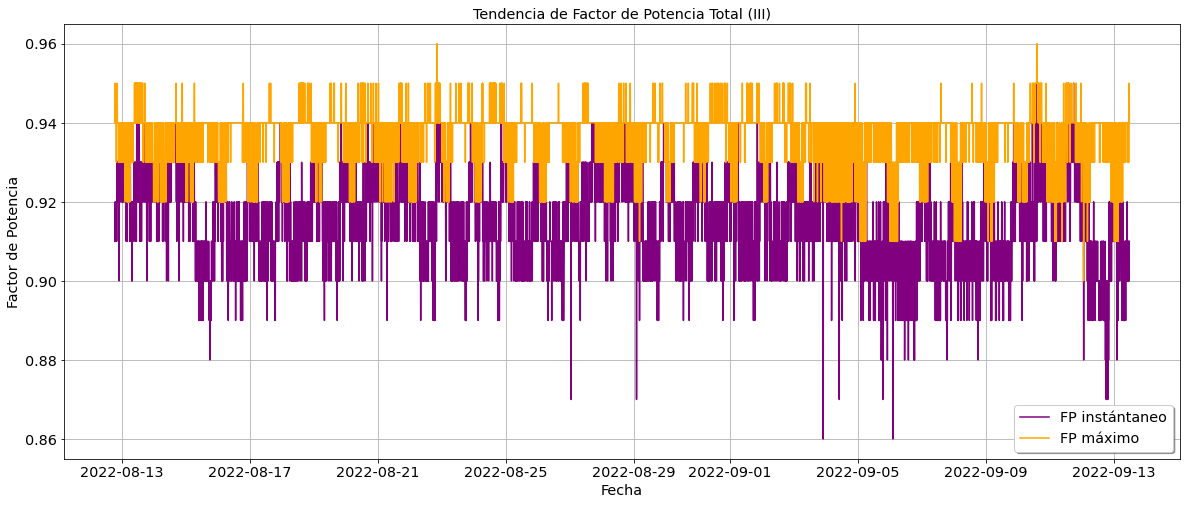

In [32]:
plt.figure(figsize=(20,8))
x1= df2['Fecha']
pfi= df2['PF-inst']
pfm= df2['PF-max']
plt.plot(x1, pfi, color='purple', label='FP instántaneo')

plt.plot(x1, pfm, color='orange', label='FP máximo')

plt.title('Tendencia de Factor de Potencia Total (III)')
plt.xlabel('Fecha')
plt.ylabel('Factor de Potencia')
plt.legend(loc='lower right',shadow=True)
plt.grid()


## 9.1 Factor de potencia instantaneo promedio

In [33]:
pfi= df2['PF-inst']

pfi.mean(axis='index')

0.9158308686602888

## 9.2 Factor de potencia maximo promedio

In [34]:
pfm= df2['PF-max']

pfm.mean(axis='index')

0.9358385365318721

## 9.3 Histograma de factor de potencia instantaneo

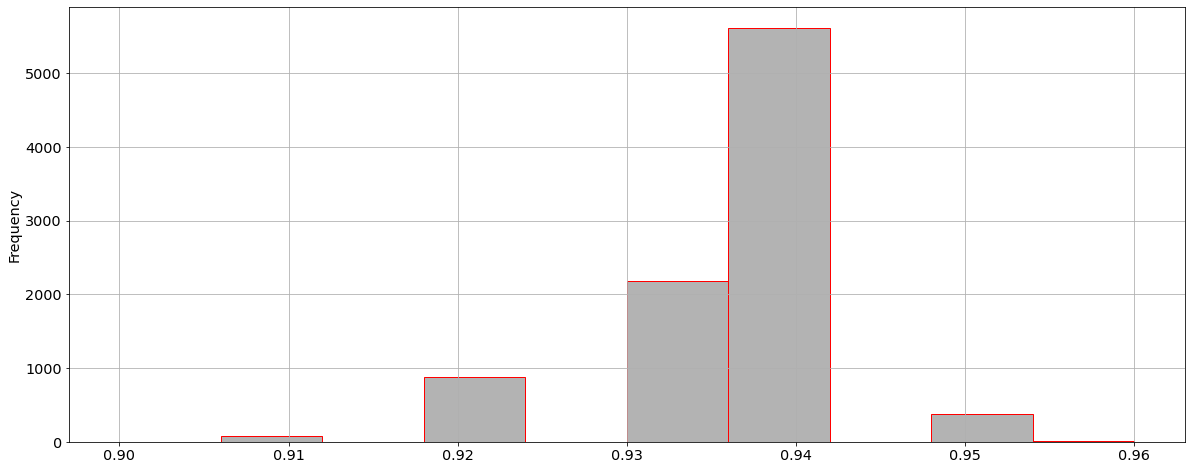

In [35]:
plt.figure(figsize=(20,8))
pfplot= pfm.plot(kind="hist", color="0.7", ec="red")
plt.grid()
plt.show()

## 9.4 Requerimiento de Factor de potencia de acuerdo al CDR

In [40]:
df2['PF-inst'].value_counts(bins=[0,0.89,0.949,1], normalize=True)

(0.89, 0.949]     0.974148
(-0.001, 0.89]    0.025304
(0.949, 1.0]      0.000548
Name: PF-inst, dtype: float64

In [41]:
df2['PF-max'].value_counts(bins=[0,0.89,0.949,1], normalize=True)

(0.89, 0.949]     0.958484
(0.949, 1.0]      0.041516
(-0.001, 0.89]    0.000000
Name: PF-max, dtype: float64

# 10. Flicker PST PLT

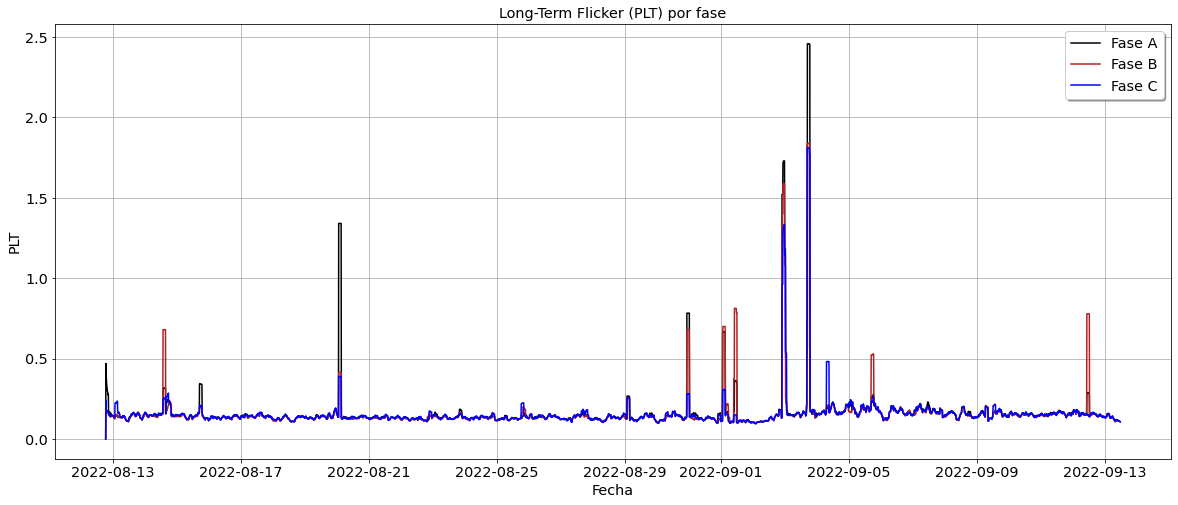

In [34]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
plta= df1['PLT-A']
pltb= df1['PLT-B']
pltc= df1['PLT-C']

plt.plot(x1, plta, color ='black', label='Fase A')
plt.plot(x1, pltb, color = 'firebrick', label='Fase B')
plt.plot(x1, pltc, color = 'blue', label= 'Fase C')

plt.title('Long-Term Flicker (PLT) por fase')
plt.xlabel('Fecha')
plt.ylabel('PLT')
plt.grid()
plt.legend( shadow=True, loc='upper right' )
plt.show()

## 10.1 Flicker PLT - A promedio

In [35]:
plta= df1['PLT-A']

plta.mean(axis='index')

0.16446275197195417

## 10.2 Flicker PLT - B promedio

In [36]:
pltb= df1['PLT-B']

pltb.mean(axis='index')

0.16083545135845712

## 10.3 Flicker PLT - C promedio

In [37]:
pltc= df1['PLT-C']

pltc.mean(axis='index')

0.15705565293602067

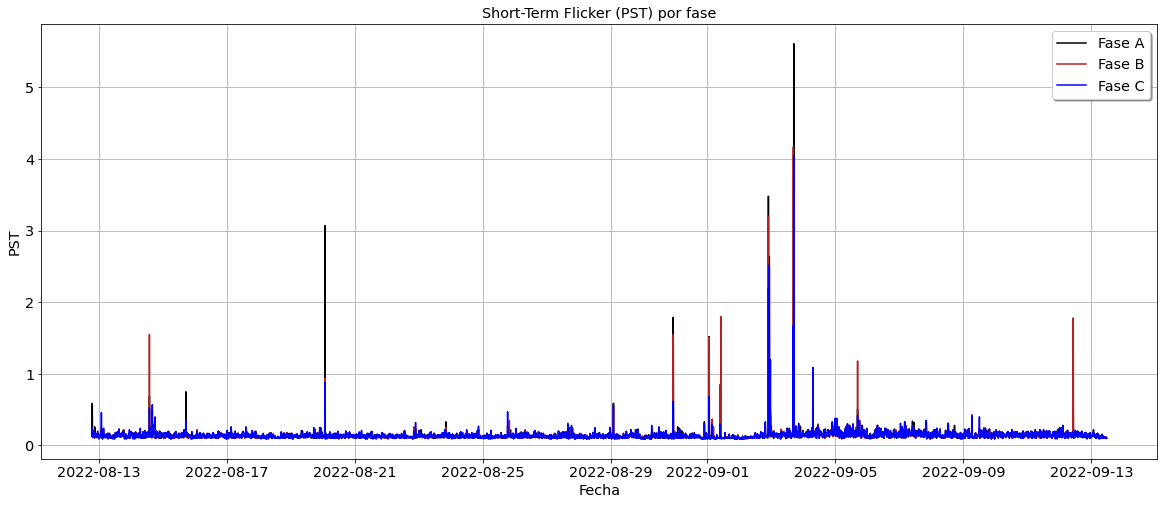

In [38]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
psta= df1['PST-A']
pstb= df1['PST-B']
pstc= df1['PST-C']

plt.plot(x1, psta, color ='black', label='Fase A')
plt.plot(x1, pstb, color = 'firebrick', label='Fase B')
plt.plot(x1, pstc, color = 'blue', label= 'Fase C')

plt.title('Short-Term Flicker (PST) por fase')
plt.xlabel('Fecha')
plt.ylabel('PST')
plt.grid()
plt.legend( shadow=True, loc='upper right' )
plt.show()

## 10.4 Flicker PST - A promedio

In [39]:
psta= df1['PST-A']

psta.mean(axis='index')

0.1437686240140228

## 10.5 Flicker PST - B promedio

In [40]:
pstb= df1['PST-B']

pstb.mean(axis='index')

0.14152936021034215

## 10.6 Flicker PST - C promedio

In [41]:
pstc= df1['PST-C']

pstc.mean(axis='index')

0.14275197195442582

# 11. Desbalance de voltaje y corriente

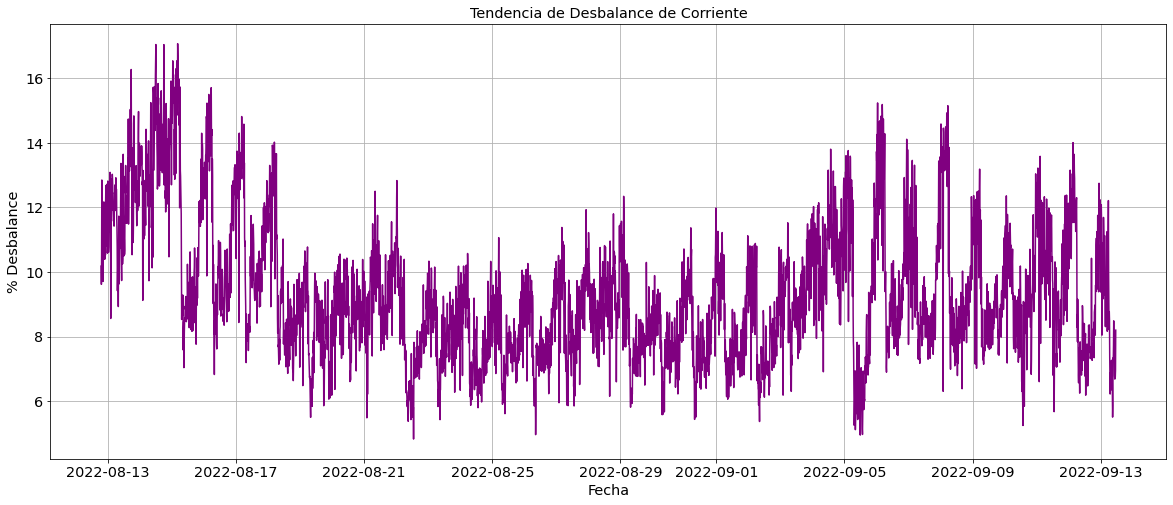

In [43]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
iunbalance= df4['%unb-iH']

plt.plot(x1, iunbalance, color ='purple', label='Desbalance de corriente')

plt.title('Tendencia de Desbalance de Corriente')
plt.xlabel('Fecha')
plt.ylabel('% Desbalance')
plt.grid()
plt.show()

## 11.1 Promedio de desbalance de corriente

In [48]:
iunbalance= df4['%unb-iH']

iunbalance.mean(axis='index')

9.347698482612925

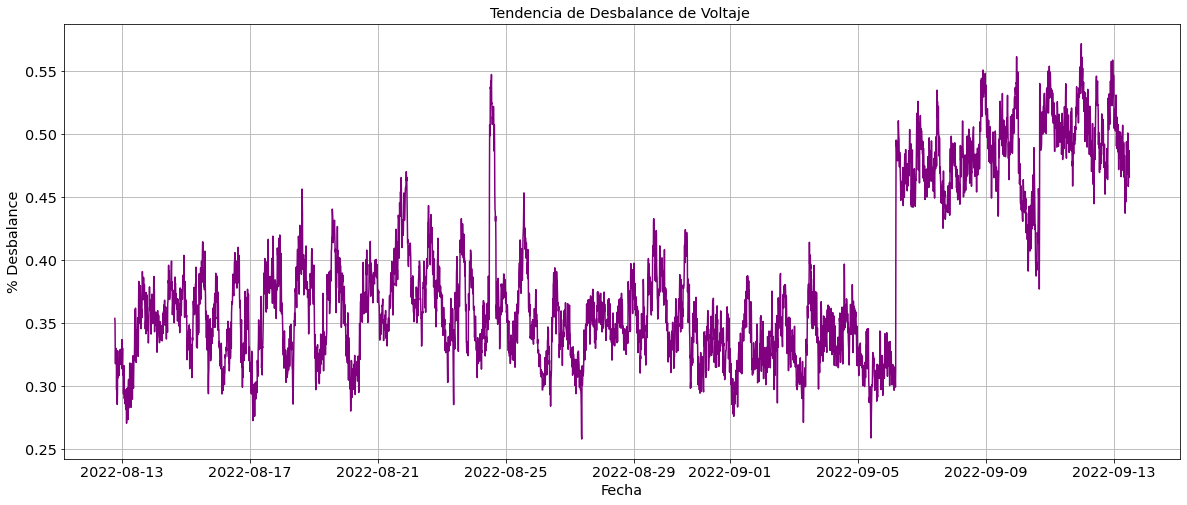

In [44]:
plt.figure(figsize=(20,8))
x1= df1['Fecha']
vunbalance= df4['%unb-vH']

plt.plot(x1, vunbalance, color ='purple', label='Desbalance de voltaje')

plt.title('Tendencia de Desbalance de Voltaje ')
plt.xlabel('Fecha')
plt.ylabel('% Desbalance')
plt.grid()
plt.show()

## 11.2 Promedio de desbalance de voltaje

In [45]:
vunbalance= df4['%unb-vH']

vunbalance.mean(axis='index')

0.38296391484888626

# 12. Armonicos de corriente

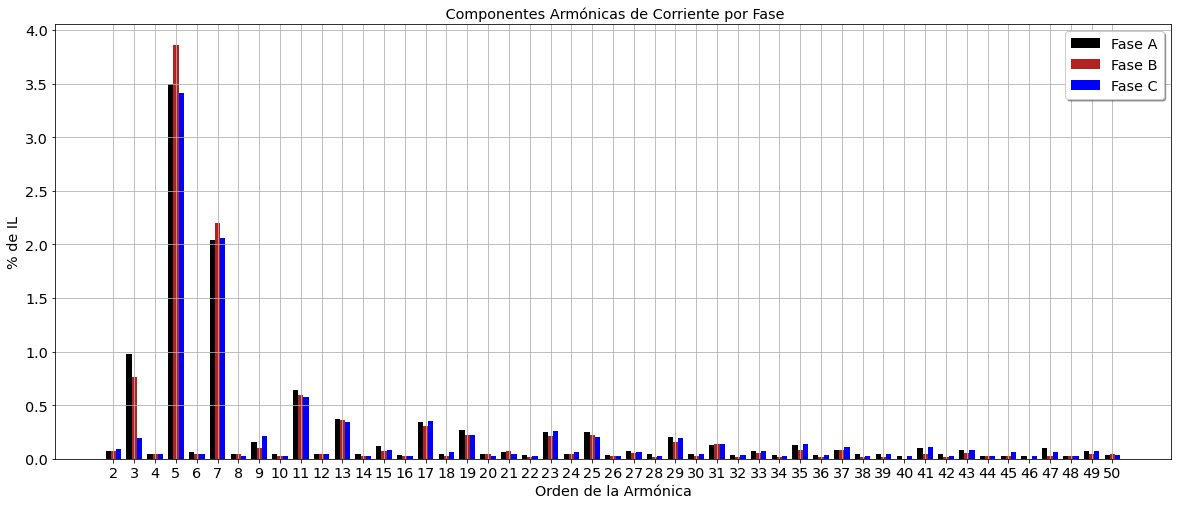

In [46]:
plt.figure(figsize=(20,8))
orden= df3['Order']
aperch= df3['a-perc-h']
bperch= df3['b-perc-h']
cperch= df3['c-perc-h']

width=0.25

indx= np.arange(len(orden))

plt.bar(indx - width, aperch, width=width, color ='black', label='Fase A')
plt.bar(indx, bperch, width=width, color ='firebrick', label='Fase B')
plt.bar(indx + width, cperch, width=width, color ='blue', label='Fase C')


plt.title(' Componentes Armónicas de Corriente por Fase')
plt.xlabel('Orden de la Armónica')
plt.ylabel('% de IL')
plt.xticks(ticks=indx, labels=orden)

plt.grid()
plt.legend( shadow=True )
plt.show()

# 13. Distorsión armonica Total (THD)

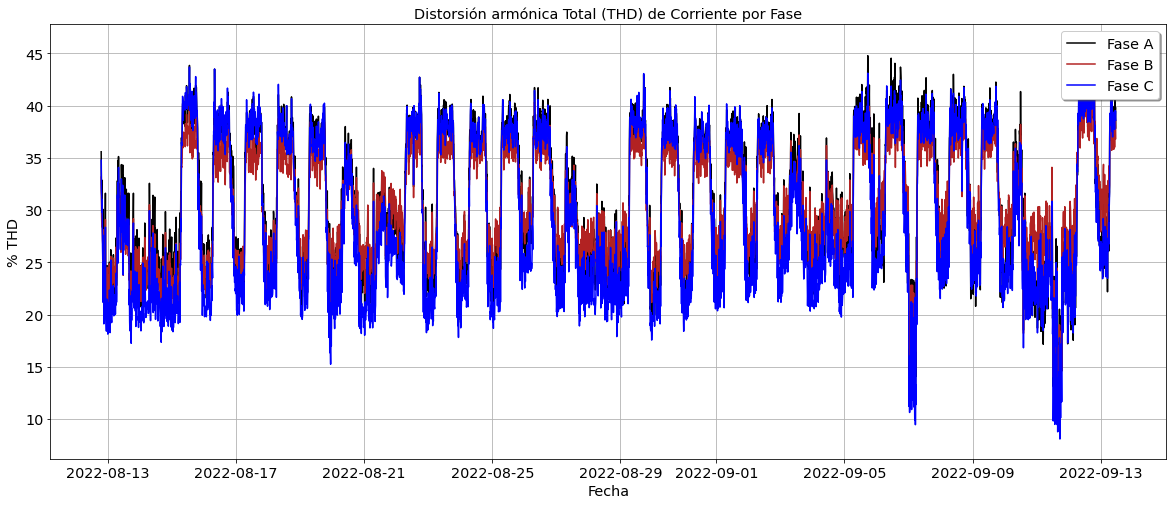

In [8]:
plt.figure(figsize=(20,8))
tf= df5['Fecha']
thdia= df5['thdi-a']
thdib= df5['thdi-b']
thdic= df5['thdi-c']

plt.plot(tf, thdia, color ='black', label='Fase A')
plt.plot(tf, thdib, color = 'firebrick', label='Fase B')
plt.plot(tf, thdic, color = 'blue', label= 'Fase C')

plt.title('Distorsión armónica Total (THD) de Corriente por Fase')
plt.xlabel('Fecha')
plt.ylabel('% THD')
plt.grid()
plt.legend( shadow=True, loc='upper right' )
plt.show()

## 13.1 Promedio THD-I Fase A 

In [10]:
thdia= df5['thdi-a']

thdia.mean(axis='index')

30.850339614373276

## 13.2 Promedio THD-I Fase B

In [11]:
thdib= df5['thdi-b']

thdib.mean(axis='index')

30.665477651183203

## 13.3 Promedio THD-I Fase C

In [12]:
thdic= df5['thdi-c']

thdic.mean(axis='index')

29.226551270815058

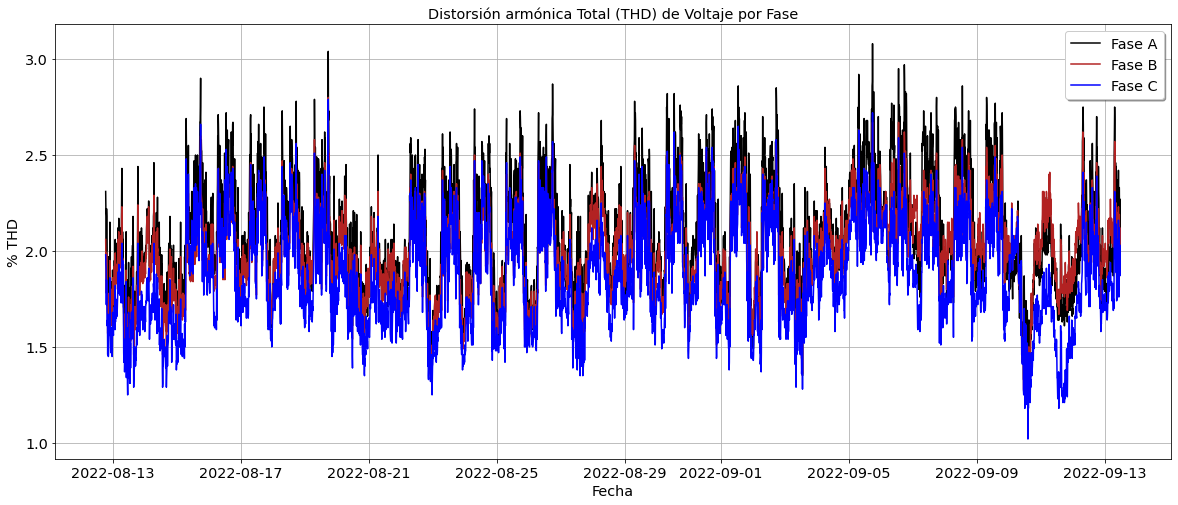

In [9]:
plt.figure(figsize=(20,8))
tf= df5['Fecha']
thdva= df5['thdv-a']
thdvb= df5['thdv-b']
thdvc= df5['thdv-c']

plt.plot(tf, thdva, color ='black', label='Fase A')
plt.plot(tf, thdvb, color = 'firebrick', label='Fase B')
plt.plot(tf, thdvc, color = 'blue', label= 'Fase C')

plt.title('Distorsión armónica Total (THD) de Voltaje por Fase')
plt.xlabel('Fecha')
plt.ylabel('% THD')
plt.grid()
plt.legend( shadow=True, loc='upper right' )
plt.show()

## 13.4 Promedio THD-V Fase A 

In [13]:
thdva= df5['thdv-a']

thdva.mean(axis='index')

2.0990468886941316

## 13.5 Promedio THD-V Fase B

In [14]:
thdvb= df5['thdv-b']

thdvb.mean(axis='index')

1.9949079754601355

## 13.6 Promedio THD-V Fase C 

In [15]:
thdvc= df5['thdv-c']

thdvc.mean(axis='index')

1.8653724802804617